In [114]:
#Variables
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Q2 i - Li
cells_per_pack_Li = 30
cells_per_pack_Al = 40
total_packs_required_Li = 5000
total_packs_required_Al = 5000
operational_hours_per_day = 20
operational_days_per_week = 7
picking_time_per_cell = 10  # seconds
bin_replacement_time = 15 # Seconds
defect_rate_Li = 1 / 4000
defect_rate_Al = 1 / 2000
n_lines = 1
n_conveyer = 3
n_robot_li = 1
n_robot_Al = 1
n_robot = n_robot_li+n_robot_Al
number_of_components_per_line = n_conveyer+n_robot
probability_of_failure = 0.01
probability_of_failure_per_pack = (number_of_components_per_line*probability_of_failure)
average_downtime_per_failure = 30 * 60  # converting minutes to seconds
#Cost Analysis
cost_per_conveyer = 10*1e3
cost_per_robot = 125*1e3
conveyer_use_per_hour = 10 
robot_use_per_hour = 10
conveyer_repair_per_hour = 1000
robot_repair_per_hour = 1000
current_cost = 155*1e3

In [115]:
# Effective cells needed considering defects
print('\nLITHIUM BATTERIES')
effective_cells_per_pack_Li = cells_per_pack_Li / (1 - defect_rate_Li)
print(f'The total number of packs required including the rate of defect to meet the annual demand is {effective_cells_per_pack_Li}')
# Total effective cells needed
total_effective_cells_Li = effective_cells_per_pack_Li * total_packs_required_Li
print(f'If this value of {effective_cells_per_pack_Li} is converted in the number of cell that needs to manufactured, this is {total_effective_cells_Li}')
print("----------")

print('\nALUMINIUM BATTERIES')
# Effective cells needed considering defects
effective_cells_per_pack_Al = cells_per_pack_Al / (1 - defect_rate_Al)
print(f'The total number of packs required including the rate of defect to meet the annual demand is {effective_cells_per_pack_Al}')
# Total effective cells needed
total_effective_cells_Al = effective_cells_per_pack_Al * total_packs_required_Al
print(f'If this value of {effective_cells_per_pack_Al} is converted in the number of cell that needs to manufactured, this is {total_effective_cells_Al}')
print("----------")




LITHIUM BATTERIES
The total number of packs required including the rate of defect to meet the annual demand is 30.007501875468865
If this value of 30.007501875468865 is converted in the number of cell that needs to manufactured, this is 150037.50937734434
----------

ALUMINIUM BATTERIES
The total number of packs required including the rate of defect to meet the annual demand is 40.0200100050025
If this value of 40.0200100050025 is converted in the number of cell that needs to manufactured, this is 200100.0500250125
----------


In [116]:
downtime_per_second_overall =  ((probability_of_failure_per_pack/effective_cells_per_pack_Li+probability_of_failure_per_pack/effective_cells_per_pack_Al))*average_downtime_per_failure
print(f'The downtime per cell is {downtime_per_second_overall} seconds')
downtime_Li = (downtime_per_second_overall*total_effective_cells_Li)/3600
print(f'Total Time down for lithium is {downtime_Li} hours')
downtime_Al = (downtime_per_second_overall*total_effective_cells_Al)/3600
print(f'Total Time down for lithium is {downtime_Al} hours')

print('\nLITHIUM')
print('         ACTUAL')
Time_per_pack_Li = (picking_time_per_cell+(bin_replacement_time/effective_cells_per_pack_Li)+(bin_replacement_time/effective_cells_per_pack_Al))*effective_cells_per_pack_Li+downtime_per_second_overall*effective_cells_per_pack_Li
print(f'Time taken per pack for Lithium is {Time_per_pack_Li} seconds')
Operational_time_actual_Li = (Time_per_pack_Li*total_packs_required_Li)/3600
print(f'The Operational Time for Lithium is {Operational_time_actual_Li} hours')
Production_rate_Li = 3600/Time_per_pack_Li
print(f'ACTUAL Production per hour for lithium is {Production_rate_Li} unit per hour')
print('         IDEAL')
Time_per_pack_Li_ideal = (picking_time_per_cell+(bin_replacement_time/cells_per_pack_Li)+(bin_replacement_time/cells_per_pack_Al))*cells_per_pack_Li
print(f'The ideal time per pack for lithium is {Time_per_pack_Li_ideal} seconds')
Operational_time_ideal_Li = (Time_per_pack_Li_ideal*total_packs_required_Li)/3600
print(f'The ideal cycle time is {Operational_time_ideal_Li} hours')
Production_rate_Li_ideal = 3600/Time_per_pack_Li_ideal
print(f'IDEAL Production per hour for Lithium is {Production_rate_Li_ideal} unit per hour')
Efficiency_dual_Li = Production_rate_Li/Production_rate_Li_ideal
print(f'\nEfficiency for the Lithium section is {Efficiency_dual_Li*1e2} %')


print('\nALUMINIUM')
print('         ACTUAL')
Time_per_pack_Al = (picking_time_per_cell+(bin_replacement_time/effective_cells_per_pack_Li)+(bin_replacement_time/effective_cells_per_pack_Al))*effective_cells_per_pack_Al+downtime_per_second_overall*effective_cells_per_pack_Al
print(f'Time taken per pack for Aluminium is {Time_per_pack_Al} seconds')
Operational_time_actual_Al = (Time_per_pack_Al*total_packs_required_Al)/3600
print(f'The Operational Time for Aluminium is {Operational_time_actual_Al} hours')
Production_rate_Al = 3600/Time_per_pack_Al
print(f'ACTUAL Production per hour for Aluminium is {Production_rate_Al} unit per hour')
print('         IDEAL')
Time_per_pack_Al_ideal = (picking_time_per_cell+(bin_replacement_time/cells_per_pack_Li)+(bin_replacement_time/cells_per_pack_Al))*cells_per_pack_Al
print(f'The ideal time per pack for Aluminium is {Time_per_pack_Al_ideal} seconds')
Operational_time_ideal_Al = (Time_per_pack_Al_ideal*total_packs_required_Al)/3600
print(f'The ideal cycle time is {Operational_time_ideal_Al} hours')
Production_rate_Al_ideal = 3600/Time_per_pack_Al_ideal
print(f'IDEAL Production per hour for Aluminium is {Production_rate_Al_ideal} unit per hour')
Efficiency_dual_Al = Production_rate_Al/Production_rate_Al_ideal
print(f'\nEfficiency for the Lithium section is {Efficiency_dual_Al*1e2} %')


The downtime per cell is 5.248125000000001 seconds
Total Time down for lithium is 218.7265566391598 hours
Total Time down for lithium is 291.70835417708855 hours

LITHIUM
         ACTUAL
Time taken per pack for Lithium is 483.8053263315829 seconds
The Operational Time for Lithium is 671.9518421271985 hours
ACTUAL Production per hour for lithium is 7.441009439265017 unit per hour
         IDEAL
The ideal time per pack for lithium is 326.25 seconds
The ideal cycle time is 453.125 hours
IDEAL Production per hour for Lithium is 11.03448275862069 unit per hour

Efficiency for the Lithium section is 67.4341480433392 %

ALUMINIUM
         ACTUAL
Time taken per pack for Aluminium is 645.2351175587794 seconds
The Operational Time for Aluminium is 896.1598854983047 hours
ACTUAL Production per hour for Aluminium is 5.579361541294362 unit per hour
         IDEAL
The ideal time per pack for Aluminium is 435.0 seconds
The ideal cycle time is 604.1666666666666 hours
IDEAL Production per hour for Alum

In [123]:
print("COST ANALYSIS")
#####COST
# Purchase Cost
Total_cost_conveyer = n_conveyer*cost_per_conveyer
Total_cost_robot = n_robot*cost_per_robot
Total_purchase_cost = (Total_cost_conveyer + Total_cost_robot)-current_cost
print(f'Conveyer cost in pound is {Total_cost_conveyer}, robot is {Total_cost_robot}, thus the total purchase cost is {Total_purchase_cost}')

###### LITHIUM
print(f'\nLITHIUM COST LINE')
# Operational Cost
# Conveyer Operational Cost
conveyer_use_cost_Li = n_conveyer*conveyer_use_per_hour*(Operational_time_actual_Li-downtime_Li)
print(f'Total Conveyer Cost for use is {conveyer_use_cost_Li} £')
conveyer_repair_cost_Li = n_conveyer*conveyer_repair_per_hour*(downtime_Li/number_of_components_per_line)
print(f'Conveyer Repair cost is: {conveyer_repair_cost_Li} £')
#Robot Operational Cost
robot_use_cost_Li = n_robot_li*robot_use_per_hour*(Operational_time_actual_Li-downtime_Li)
print(f'Total Robot Cost for use is {robot_use_cost_Li} £')
robot_repair_cost_Li = n_robot_li*robot_repair_per_hour*(downtime_Li/number_of_components_per_line)
print(f'Robot Repair cost is: {robot_repair_cost_Li} £')
total_operational_cost_Li = (conveyer_use_cost_Li + conveyer_repair_cost_Li + robot_use_cost_Li + robot_repair_cost_Li)
print(f'Total Operational Cost of all Lithium Line is: {total_operational_cost_Li} £')
total_Li_cost = ((((Total_cost_conveyer/2)+n_robot_li)-current_cost/2)+total_operational_cost_Li)
total_Li_cost_hour = (total_operational_cost_Li/Operational_time_actual_Li)
print(f'Total Operational cost per hour for Li is: {total_Li_cost_hour}')
print(f'The Total Cost of Li is: {total_Li_cost}')

#UNIT COST LI
capra_Li = (total_Li_cost)/Operational_time_actual_Li
print(capra_Li)
print(f'\nUnit Processing Cost for Li battery is {(capra_Li)/Production_rate_Li}')

###### ALUMINIUM
print(f'\nALUMINIUM COST LINE')
# Operational Cost
# Conveyer Operational Cost
conveyer_use_cost_Al = n_conveyer*conveyer_use_per_hour*(Operational_time_actual_Al-downtime_Al)
print(f'Total Conveyer Cost for use is {conveyer_use_cost_Al} £')
conveyer_repair_cost_Al = n_conveyer*conveyer_repair_per_hour*(downtime_Al/number_of_components_per_line)
print(f'Conveyer Repair cost is: {conveyer_repair_cost_Al} £')
#Robot Operational Cost
robot_use_cost_Al = n_robot_Al*robot_use_per_hour*(Operational_time_actual_Al-downtime_Al)
print(f'Total Robot Cost for use is {robot_use_cost_Al} £')
robot_repair_cost_Al = n_robot_Al*robot_repair_per_hour*(downtime_Al/number_of_components_per_line)
print(f'Robot Repair cost is: {robot_repair_cost_Al} £')
total_operational_cost_Al = (conveyer_use_cost_Al + conveyer_repair_cost_Al + robot_use_cost_Al + robot_repair_cost_Al)
print(f'Total Operational Cost of all Aluminium Line is: {total_operational_cost_Al} £')
total_Al_cost = ((((Total_cost_conveyer/2)+n_robot_Al)-current_cost/2)+total_operational_cost_Al)
total_Al_cost_hour = (total_operational_cost_Al/Operational_time_actual_Al)
print(f'Total Operational cost per hour for Al is: {total_Al_cost_hour}')
print(f'The Total Cost of Al is: {total_Al_cost}')

#UNIT COST Al
capra_Al = (total_Al_cost)/Operational_time_actual_Al
print(capra_Al)
print(f'\nUnit Processing Cost for Li battery is {(capra_Al)/Production_rate_Al}')


COST ANALYSIS
Conveyer cost in pound is 30000.0, robot is 250000.0, thus the total purchase cost is 125000.0

LITHIUM COST LINE
Total Conveyer Cost for use is 13596.758564641159 £
Conveyer Repair cost is: 131235.9339834959 £
Total Robot Cost for use is 4532.252854880387 £
Robot Repair cost is: 43745.311327831965 £
Total Operational Cost of all Lithium Line is: 193110.2567308494 £
Total Operational cost per hour for Li is: 287.3870486306282
The Total Cost of Li is: 130611.25673084939
194.37591884170334

Unit Processing Cost for Li battery is 26.122251346169875

ALUMINIUM COST LINE
Total Conveyer Cost for use is 18133.545939636486 £
Conveyer Repair cost is: 175025.01250625312 £
Total Robot Cost for use is 6044.515313212161 £
Robot Repair cost is: 58341.67083541771 £
Total Operational Cost of all Aluminium Line is: 257544.74459451943 £
Total Operational cost per hour for Al is: 287.38704863062816
The Total Cost of Al is: 195045.74459451943
217.64614523675687

Unit Processing Cost for Li b


Total Operational Cost per hour of every line is: 574.7740972612564 £


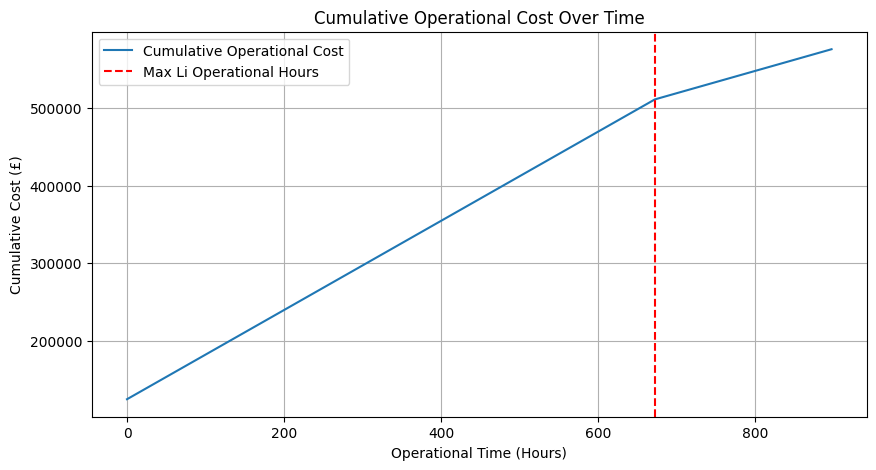

In [118]:
# # Graph
# Total operational cost
total_operational_cost = total_operational_cost_Li/Operational_time_actual_Li + total_operational_cost_Al/Operational_time_actual_Al
print(f'\nTotal Operational Cost per hour of every line is: {total_operational_cost} £')

# Calculate cumulative costs over time
time_hours_Li = np.arange(0, Operational_time_actual_Li + 1)
time_hours_Al = np.arange(Operational_time_actual_Li, Operational_time_actual_Al + 1)

# THIS ONE FOR JUST LITHIUM ON ITS OWN
# cost_accumulated_Li = total_operational_cost * time_hours_Li 

cost_accumulated_Li = total_operational_cost * time_hours_Li + Total_purchase_cost
cost_accumulated_Al = cost_accumulated_Li[-1] + total_Al_cost_hour * (time_hours_Al - Operational_time_actual_Li)

# THIS ONE FOR JUST LITHIUM ON ITS OWN
# time_hours_combined = time_hours_Li
# cost_accumulated_combined = cost_accumulated_Li

# Combine arrays for plotting
time_hours_combined = np.concatenate([time_hours_Li, time_hours_Al[1:]])
cost_accumulated_combined = np.concatenate([cost_accumulated_Li, cost_accumulated_Al[1:]])

# Plotting the cumulative cost graph
plt.figure(figsize=(10, 5))

# THIS ONE FOR JUST LITHIUM ON ITS OWN
# plt.plot(time_hours_Li, cost_accumulated_Li, label='Cumulative Operational Cost')

plt.plot(time_hours_combined, cost_accumulated_combined, label='Cumulative Operational Cost')
plt.title('Cumulative Operational Cost Over Time')
plt.xlabel('Operational Time (Hours)')
plt.ylabel('Cumulative Cost (£)')
plt.axvline(x=Operational_time_actual_Li, color='r', linestyle='--', label='Max Li Operational Hours')
plt.legend()
plt.grid(True)
plt.show()

In [119]:
# Save coordinates in Excel
# Your DataFrame data setup
df = pd.DataFrame({
    "Time (Hours)": time_hours_combined,
    "Cumulative Cost (£)": cost_accumulated_combined
})

# Set the path to where you want to save the Excel file on your local machine
file_path = fr"C:\Users\abhin\OneDrive - University of Southampton\1 - University of Southampton\Part 4 - University of Southampton\Manufacturing\2 - CW\Q2\Manufacturing-CW2\EXCEL\Cumulative_Operational_Cost_Over_Time_SINGLE LINE_{total_packs_required_Li}_{n_conveyer}_{n_robot}.xlsx"

# Save the DataFrame to an Excel file at the specified path
df.to_excel(file_path, index=False)